# Exam: Numerical Analysis for Machine Learning
## Name: Roberto Benatuil
## Date: February 6, 2025

### Exercise 1

The Fashion-MNIST dataset is a dataset of 60000 28 × 28 grayscale images of 10 fashion categories, along with a test set of 10000 images. You can load the dataset using the following commands:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

#### 1) 

In [3]:
x_mod_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_mod_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(f"Shape of dataset: {x_mod_train.shape}")
print(f"Samples: {x_mod_train.shape[0]}")

Shape of dataset: (60000, 784)
Samples: 60000


In [4]:
mask_train = (y_train == 0) | (y_train == 7)
mask_test = (y_test == 0) | (y_test == 7)

x_mod_train = x_mod_train[mask_train]
y_mod_train = y_train[mask_train]

x_mod_test = x_mod_test[mask_test]
y_mod_test = y_test[mask_test]

print(f"Shape of modified dataset: {x_mod_train.shape}")
print(f"Samples: {x_mod_train.shape[0]}")

Shape of modified dataset: (12000, 784)
Samples: 12000


#### 2) 

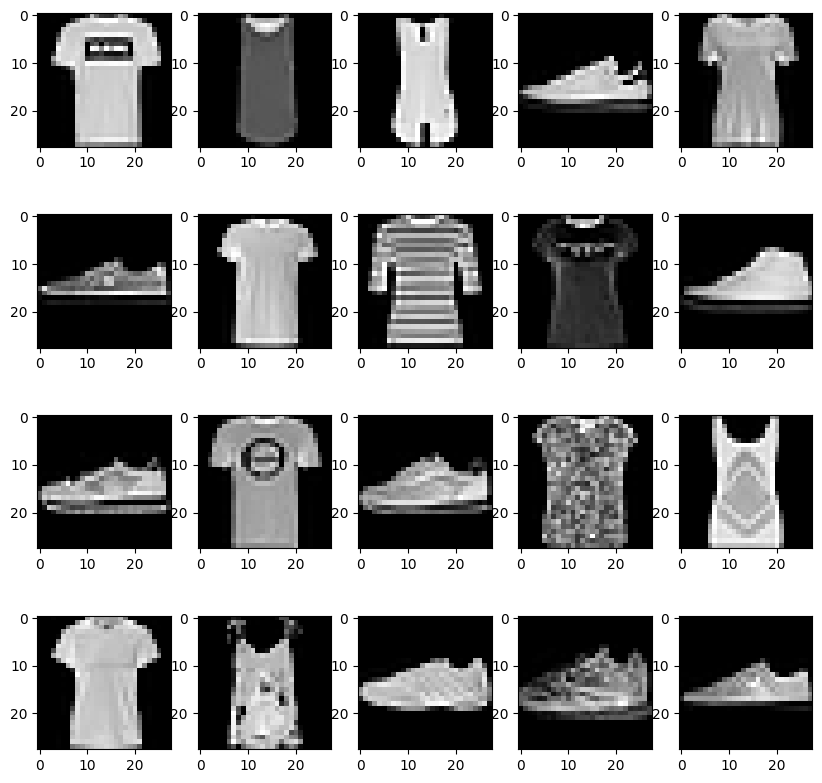

In [5]:
def plot_image(image, ax=None):
    img = image.reshape(28, 28)
    if ax is None:
        plt.imshow(img, cmap='gray')
    else:
        ax.imshow(img, cmap='gray')


num_images = 20

fig, ax = plt.subplots(4, 5, figsize=(10, 10))
ax = ax.flatten()

for i in range(num_images):
    plot_image(x_mod_train[i], ax[i])

plt.show()



#### 3) 

In [6]:
def randSVD(A, k):
    n = A.shape[1]
    O = np.random.randn(n, k)
    Y = A @ O
    Q, _ = np.linalg.qr(Y)
    B = Q.transpose() @ A
    U_aprox, S, V = np.linalg.svd(B, full_matrices=False)
    U = Q @ U_aprox
    return U, S, V

#### 4) 

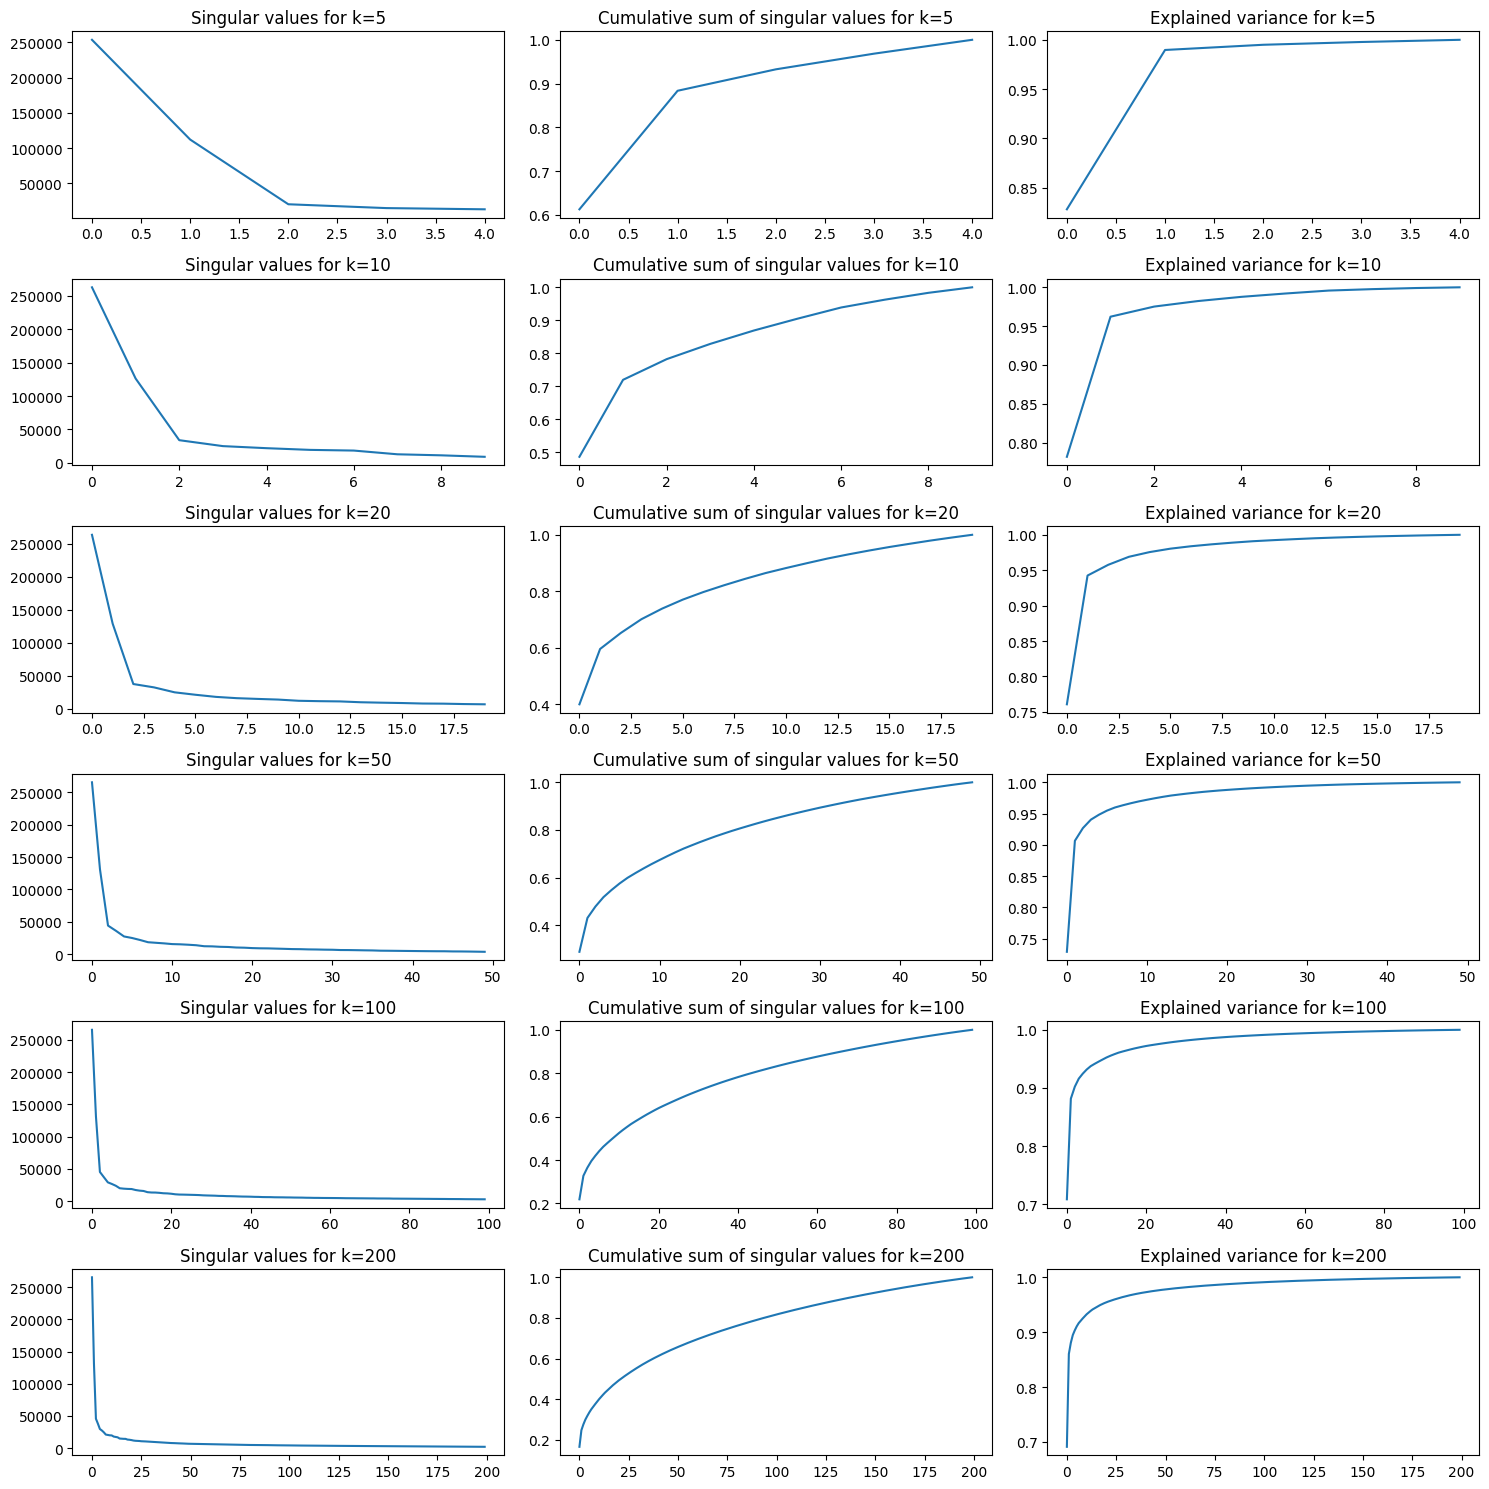

In [7]:
ks = [5, 10, 20, 50, 100, 200]

fig, ax = plt.subplots(6, 3, figsize=(15, 15))
ax = ax.flatten()

for i, k in enumerate(ks):
    U, S, V = randSVD(x_mod_train, k)
    ax[3*i].plot(S)
    ax[3*i].set_title(f"Singular values for k={k}")

    ax[3*i+1].plot(np.cumsum(S) / np.sum(S))
    ax[3*i+1].set_title(f"Cumulative sum of singular values for k={k}")

    ax[3*i+2].plot(np.cumsum(S**2) / np.sum(S**2))
    ax[3*i+2].set_title(f"Explained variance for k={k}")

plt.tight_layout()
plt.show()

We observe that, by looking at the explained variance, a good choice of $k$ would be $50$, since it explains more than the 90% of the variance of the data. Also, we confirm it by looking at the singular values graph, noticing a sharp drop and then a decay to $0$. The values from 50 to the end seem to be too small. 

In [8]:
k = 50
U, S, VT = randSVD(x_mod_train, k)

#### 5) 

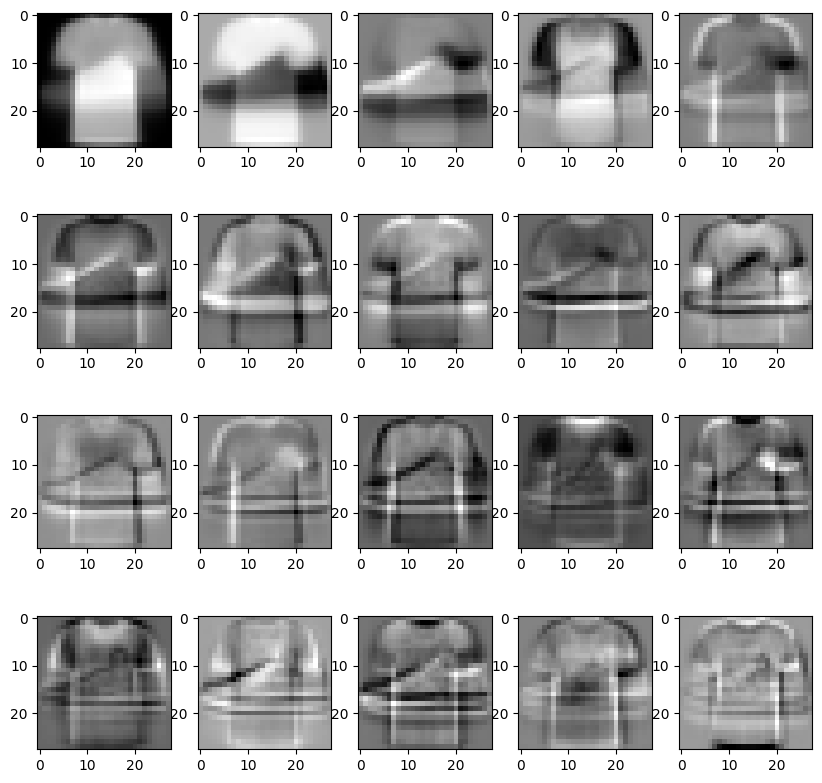

In [9]:
first_20 = VT[:20, :]

fig, ax = plt.subplots(4, 5, figsize=(10, 10))
ax = ax.flatten()

for i in range(20):
    plot_image(first_20[i], ax[i])

plt.show()

As we should expect, we see a mixture of the classes of the dataset. A lot of these images represent a T-shirt as well as a sneaker. These images show the principal details that characterize the dataset, and we can see a kind of equilibrium between the classes, that can bee explained by the fact that there are the same amount of samples for the both classes.

#### 6) 

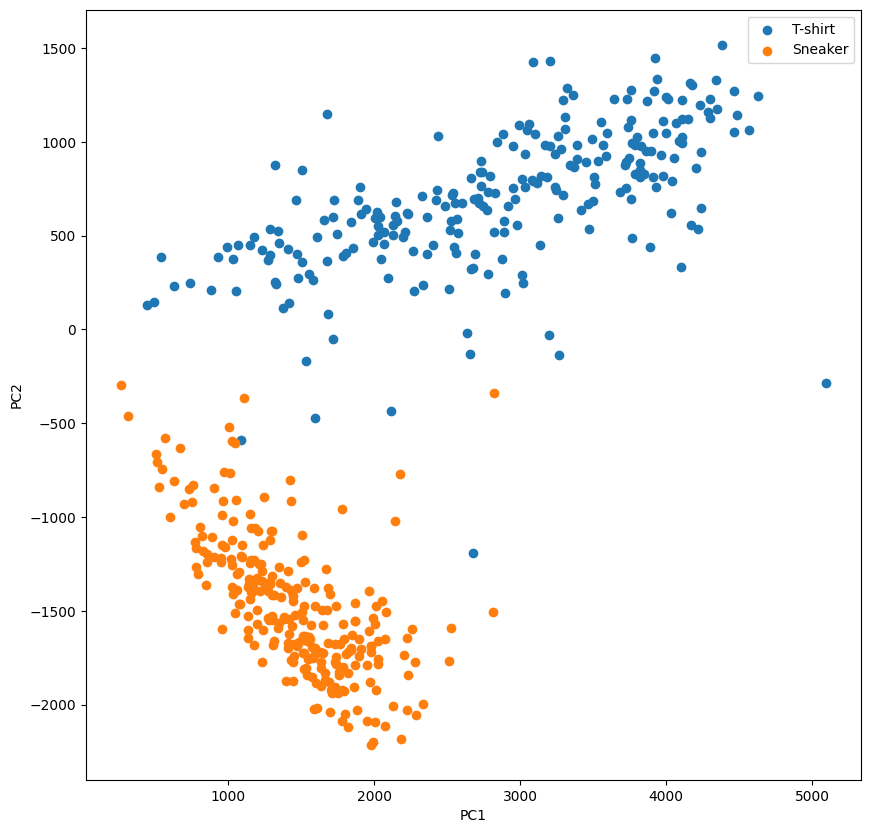

In [10]:
n_samples_to_see = 500
pc_num = 2

pc_scores = (U[:, :pc_num] @ np.diag(S[:pc_num]))[:n_samples_to_see]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

t_shirt_mask = y_mod_train[:n_samples_to_see] == 0
sneaker_mask = y_mod_train[:n_samples_to_see] == 7

t_shirt = pc_scores[t_shirt_mask]
sneaker = pc_scores[sneaker_mask]

ax.scatter(t_shirt[:, 0], t_shirt[:, 1], label='T-shirt')
ax.scatter(sneaker[:, 0], sneaker[:, 1], label='Sneaker')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()

plt.show()

#### 7) 

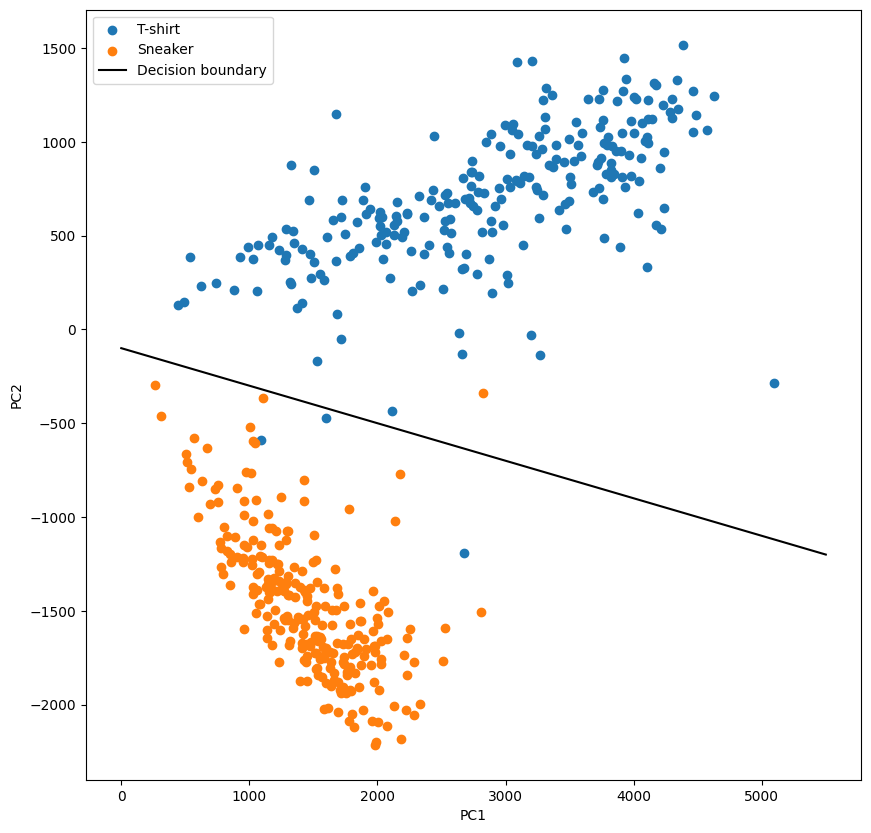

In [11]:
m = -1/5
q = -100

x = np.linspace(0, 5500, 100)

y = m * x + q

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(t_shirt[:, 0], t_shirt[:, 1], label='T-shirt')
ax.scatter(sneaker[:, 0], sneaker[:, 1], label='Sneaker')
ax.plot(x, y, label='Decision boundary', c='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()

plt.show()

#### 8)

In [12]:
pc_scores_test = x_mod_test @ VT[:2, :].T

Accuracy: 0.997


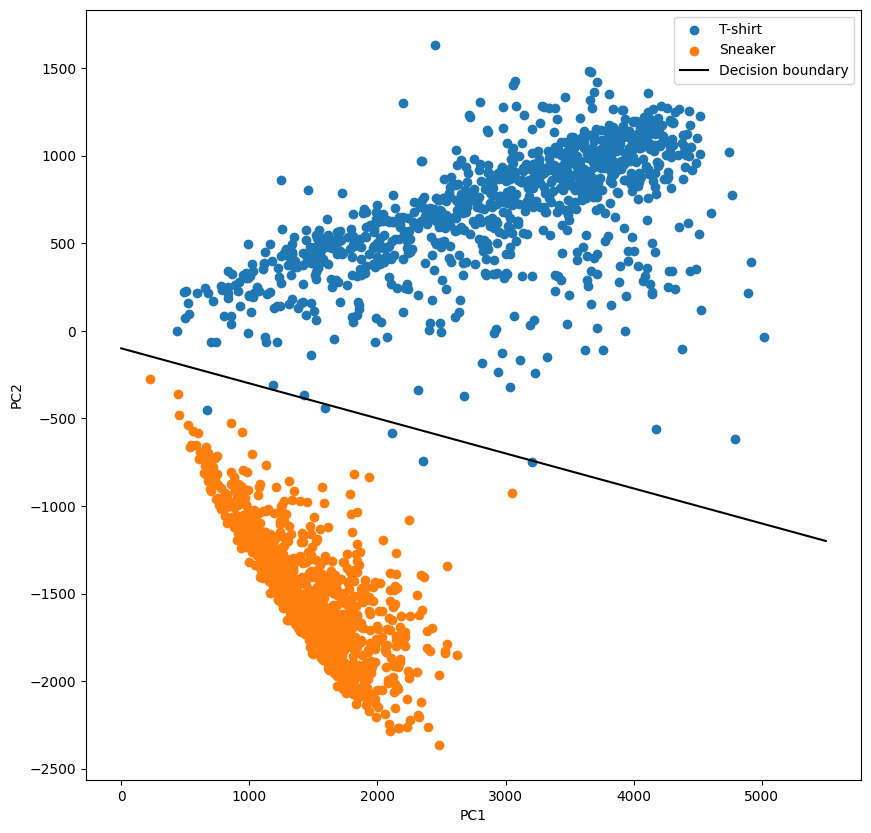

In [13]:
m = -1/5
q = -100
y = lambda x: m * x + q

y_mod_test_pred = y(pc_scores_test[:, 0]) < pc_scores_test[:, 1]
accuracy = np.mean(y_mod_test_pred == (y_mod_test == 0))

print(f"Accuracy: {accuracy}")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

t_shirt_mask = y_mod_test == 0
sneaker_mask = y_mod_test == 7

t_shirt = pc_scores_test[t_shirt_mask]
sneaker = pc_scores_test[sneaker_mask]

ax.scatter(t_shirt[:, 0], t_shirt[:, 1], label='T-shirt')
ax.scatter(sneaker[:, 0], sneaker[:, 1], label='Sneaker')

line = np.linspace(0, 5500, 100)
ax.plot(line, y(line), label='Decision boundary', c='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()

plt.show()


[[1000    0]
 [   6  994]]


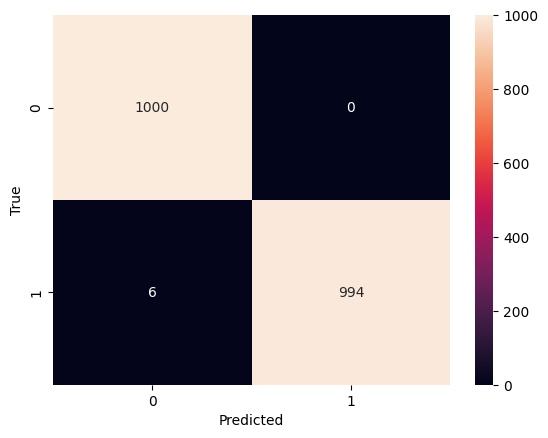

In [14]:
from sklearn.metrics import confusion_matrix    
import seaborn as sns


y_true = y_mod_test == 0
y_pred = y_mod_test_pred

conf_matrix = confusion_matrix(y_true, y_pred)

print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show() 


### Exercise 2

#### 1) 

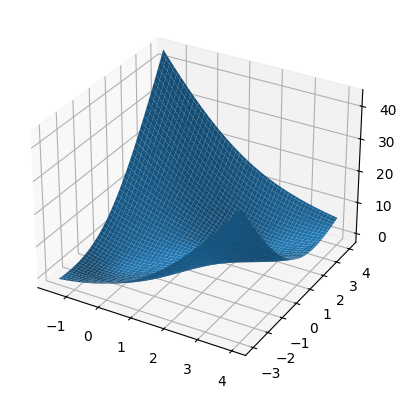

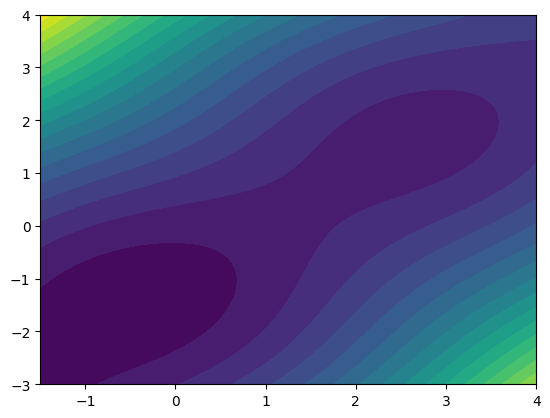

In [20]:
import jax.numpy as jnp


f = lambda x: jnp.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

x = np.linspace(-1.5, 4, 100)
y = np.linspace(-3, 4, 100)

X, Y = np.meshgrid(x, y)

Z = f([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X, Y, Z, levels=20)

plt.show()


Looking at the graph and the level curves, we can estimate that the global minimum should be at around $x \approx -0.5$ and $y \approx = -1.5$. Analitically, it should be on one of the critical points of the function (note that there seems to be 2, as the function *seems* to be locally convex in 2 regions). 

This minimum should be where the gradient is equal to the vector $\vec{0}$

The gradient is:

$$\nabla f(x, y) = (\cos(x + y) + 2(x -y) - 1.5, \cos(x + y) - 2(x - y) + 2.5)$$


#### 2) 

In [34]:
from jax import grad


def GD(
    f: callable, x0: np.ndarray, lr: float, 
    tol: float = 1e-3, max_iter: int = 100
):
    x = x0
    grad_f = grad(f)

    history = [x0]
    for i in range(max_iter):
        x = x - lr * grad_f(x)
        history.append(x)
        if np.linalg.norm(grad_f(x)) < tol:
            break

    print(f"Converged in {i} iterations")
    return x, np.array(history)


lrs = [0.01, 0.1, 0.2]
x0 = np.array([-1.0, -1.0])

for lr in lrs:
    x, _ = GD(f, x0, lr)
    print(f"Solution for lr={lr}: {x}")
    print()

Converged in 99 iterations
Solution for lr=0.01: [-0.54758656 -1.5307162 ]

Converged in 24 iterations
Solution for lr=0.1: [-0.54680514 -1.5468023 ]

Converged in 11 iterations
Solution for lr=0.2: [-0.5469219 -1.5469218]



#### 3) 

In [35]:
from jax import hessian


def newton(
    f: callable, x0: np.ndarray, lr: float,
    tol: float = 1e-3, max_iter: int = 100
):
    x = x0
    grad_f = grad(f)
    hess_f = hessian(f)

    history = [x0]
    for i in range(max_iter):
        x = x - lr * jnp.linalg.inv(hess_f(x)) @ grad_f(x)

        history.append(x)
        if np.linalg.norm(grad_f(x)) < tol:
            break

    print(f"Converged in {i} iterations")
    return x, np.array(history)

lr = 0.5
x0 = np.array([-1.0, -1.0])

x, _ = newton(f, x0, lr)

print(f"Solution for lr={lr}: {x}")

Converged in 11 iterations
Solution for lr=0.5: [-0.54730755 -1.5470634 ]


From the graph, we can see that the function is locally convex on a neighborhood of the global minimum, but also *seems to be* locally convex on a vicinity of another point (local minimum). If we start closer to the second (inside the second neighborhood), we will end on the local minimum, and not the global minimum, as the function is not globally convex. 

#### 4) 

Converged in 11 iterations
Converged in 11 iterations


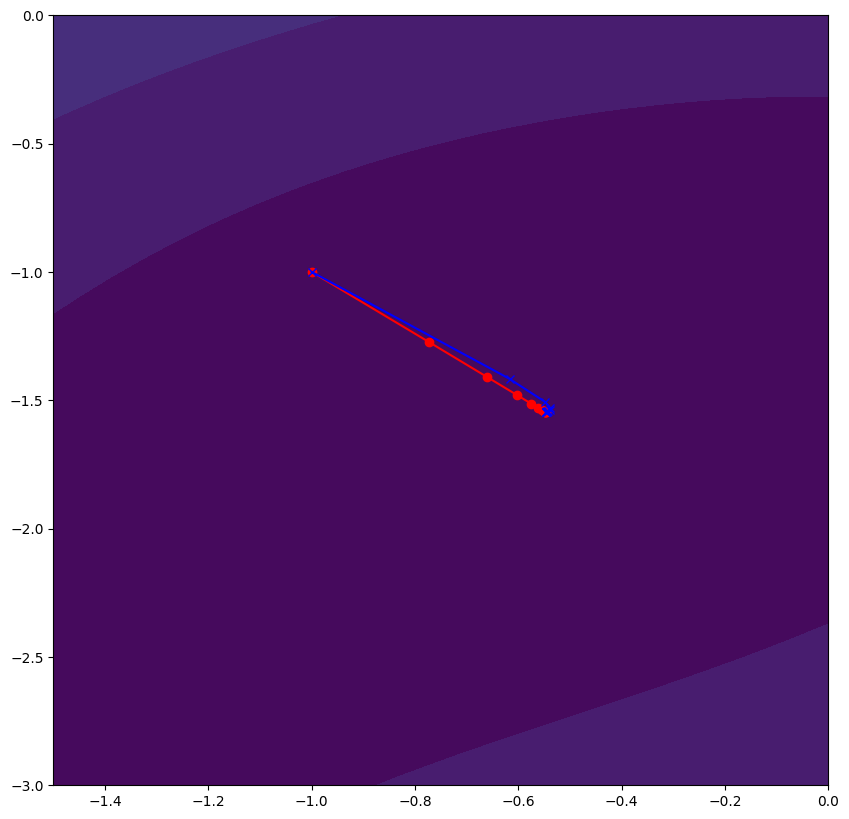

In [38]:
lr_newt = 0.5
lr_gd = 0.2
x0 = np.array([-1.0, -1.0])

x_gd, history_gd = GD(f, x0, lr_gd)
x_newton, history_newton = newton(f, x0, lr_newt)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.contourf(X, Y, Z, levels=20)
ax.plot(history_newton[:, 0], history_newton[:, 1], label='Newton', c='r', marker='o')
ax.plot(history_gd[:, 0], history_gd[:, 1], label='GD', c='b', marker='x')

ax.set_ylim(-3, 0)
ax.set_xlim(-1.5, 0)

plt.show()


We observe that both methods obtain the same result. Both reach the minimum. Now, although very subtle, we can see differences on the approach to the minimum for each method. In the Newton method we start directing to the minimum, while on the gradient method, we don't immediately direct to the minimum. That is because, as the Newton method has information about the curvature (the Hessian) of the function, in some way, it knows where to direct from the begining, while the gradient method may show a zigzagging behavior (though here it doesn't show it).

### Exercise 3

On the paper.